## Example 1.4.4 (Proakis 4th Edition)


Consider the analog signal:\
$x_{a}(t) = 3 \cdot cos(2000\pi t) +  5 \cdot sin(6000\pi t) +  10 \cdot cos(12000\pi t)$


**a) What is the Nyquist rate for this signal?**\
The frequencies existing in the analog signal are:
- F1 = 2000π / 2π = 1000 Hz = 1 KHz
- F2 = 3 Khz
- F3 = 6 Khz

Thus Fmax = 6 KHz, and according to the sampling theorem: Fs > 2Fmax = 12 Khz

**b) Asume now that we sample the signal using a sampling rate Fs = 5000 samples/s. What is the discrete-time signal obtained after sampling?**\
Since we have chosen Fs = 5 KHz, the folding frequency is Fs/2 = 2.5KHz and this  is the maximun frequency that can be represented uniquely by the sampled signal.\
By using t = nT = n/Fs, we obtain:\
$x(n) = x_{a}(nT) = x_{a}(\cfrac{n}{Fs})$\
$ \qquad = 3 \, cos(2000\pi(\cfrac{n}{5000})) +  5 \, sin(6000\pi(\cfrac{n}{5000}) +  10 \, cos(12000\pi (\cfrac{n}{5000})$\
$ \qquad = 3 \, cos(2\pi(\cfrac{1}{5})n) +  5 \, sin(6\pi(\cfrac{1}{5})n) +  10 \, cos(12\pi (\cfrac{1}{5})n)$\
$ \qquad = 3 \, cos(2\pi(\cfrac{1}{5})n) +  5 \, sin(2\pi(\cfrac{3}{5})n) +  10 \, cos(2\pi (\cfrac{6}{5})n)$\
$ \qquad = 3 \, cos(2\pi(\cfrac{1}{5})n) +  5 \, sin(2\pi(1-\cfrac{2}{5})n) +  10 \, cos(2\pi (1+\cfrac{1}{5})n)$\
$ \qquad = 3 \, cos(2\pi(\cfrac{1}{5})n) +  5 \, sin(2\pi(-\cfrac{2}{5})n) +  10 \, cos(2\pi (\cfrac{1}{5})n)$\
$ \qquad = 13 \, cos(2\pi(\cfrac{1}{5})n) -  5 \, sin(2\pi(\cfrac{2}{5})n)$

Let's see the result on code:

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import math

Create the vector n of N samples

In [158]:
Fs = 5000 # sampling rate (samples/s)
Tf = 0.001 # signal duration
N = int(Tf * Fs)
print(f"number of samples: {N}")

# samples vector
n = np.arange(N+1) # added 1, because the stop value is excluded

# Analog signal's frecuencies
F1 = 1000
F2 = 3000
F3 = 6000

# Discrete-time signal
xn1 = 3 * np.cos(2 * math.pi * F1 * (n / Fs)) + 5 * np.sin(2 * math.pi * F2 * (n / Fs)) + 10 * np.cos(2 * math.pi * F3 * (n / Fs))

# Discrete-time signal (simplified version for Fs=5KHz)
xn2 = 13 * np.cos(2 * math.pi * (1 / 5) * n ) - 5 * np.sin(2 * math.pi * (2 / 5) * n) 

number of samples: 5


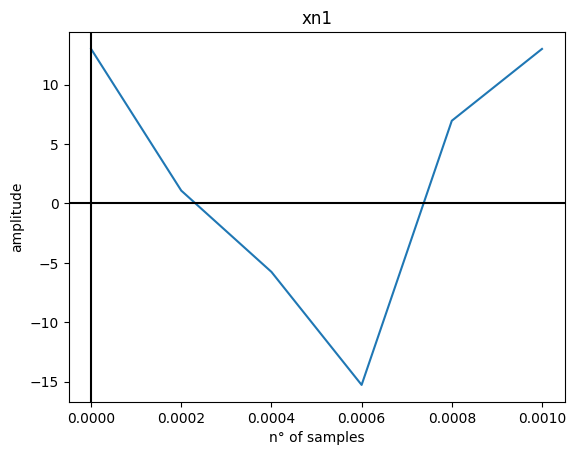

In [159]:
plt.figure()
plt.plot(n/Fs, xn1)
plt.xlabel("n° of samples")
plt.ylabel("amplitude")
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.title("xn1")
plt.show()

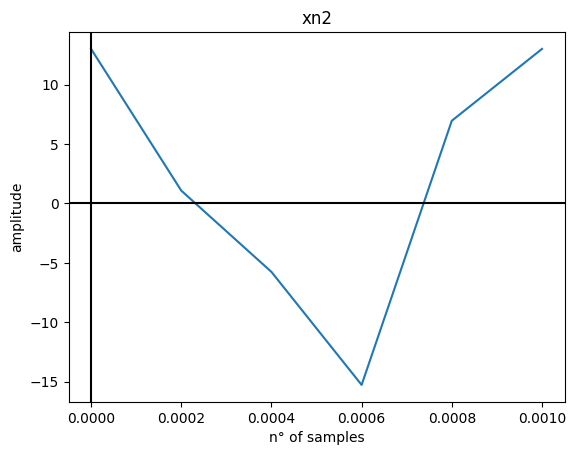

In [160]:
plt.figure()
plt.plot(n/Fs, xn2)
plt.xlabel("n° of samples")
plt.ylabel("amplitude")
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.title("xn2")
plt.show()

Let's compare previus signals with the "analog" signal:

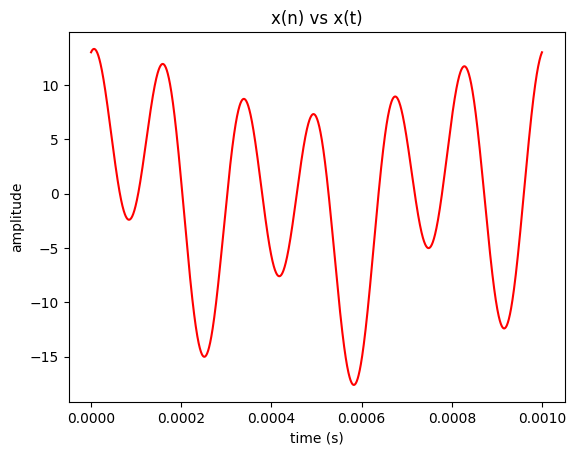

In [161]:
t = np.linspace(0, Tf, 2000)
xa = 3 * np.cos(2000 * math.pi * t) + 5 * np.sin(6000 * math.pi * t) + 10 * np.cos(12000 * math.pi * t)

plt.figure()
plt.plot(t, xa, color="red")
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.title("x(n) vs x(t)")
plt.show()

Now, we'll use an appropiate sampling frequency:

number of samples: 18


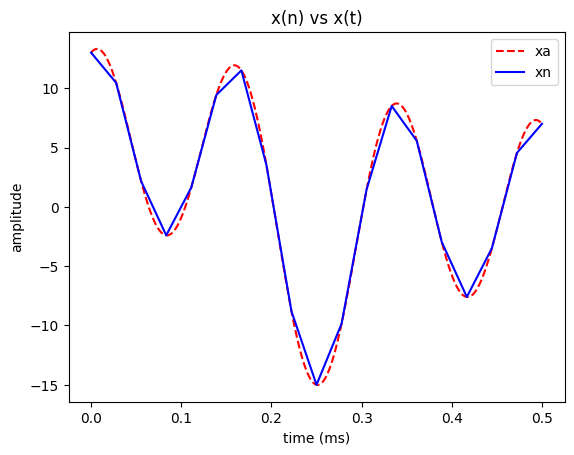

In [168]:
Fs = 36000  # sampling rate (samples/s)
Tf = 0.0005  # signal duration
N = int(Tf * Fs)
print(f"number of samples: {N}")

# samples vector
n = np.arange(N + 1)  # added 1, because the stop value is excluded

# Analog signal's frecuencies
F1 = 1000
F2 = 3000
F3 = 6000

# Discrete-time signal
xn = (
    3 * np.cos(2 * math.pi * F1 * (n / Fs))
    + 5 * np.sin(2 * math.pi * F2 * (n / Fs))
    + 10 * np.cos(2 * math.pi * F3 * (n / Fs))
)

t = np.linspace(0, Tf, 1000)

xa = (
    3 * np.cos(2000 * math.pi * t)
    + 5 * np.sin(6000 * math.pi * t)
    + 10 * np.cos(12000 * math.pi * t)
)


plt.figure()
plt.plot(t*1000, xa, color="red", label="xa", linestyle="--")
plt.plot((n/Fs)*1000, xn, color="blue", label="xn")
plt.xlabel("time (ms)")
plt.ylabel("amplitude")
plt.title("x(n) vs x(t)")
plt.legend()
plt.show()
